<a href="https://colab.research.google.com/github/ezinneanne/DeepTechReady-Work/blob/new_branch/Deep_Learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

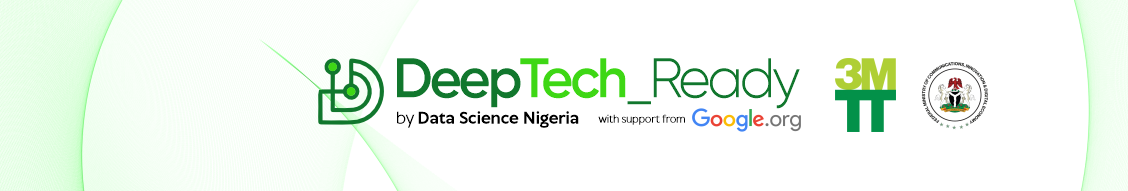

In [ ]:
# mount Google Drive to access files stored there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries for data handling and model building
import numpy as np  # Importing numpy for numerical operations
import tensorflow as tf  # Importing TensorFlow for deep learning functionality
from tensorflow import keras  # Importing Keras API for building and training models
from tensorflow.keras import layers  # Importing Keras layers to build neural networks
from tensorflow.keras.models import Sequential  # Importing Sequential model for linear stacking of layers


In [ ]:
keras.__version__

'3.8.0'

In [ ]:
# Defining parameters for image processing
batch_size = 32  # Set batch size for loading data (number of samples per batch)
img_height = 180  # Set height for resizing input images
img_width = 180  # Set width for resizing input images

In [ ]:
# Define the path to your dataset (the path will be different frp, what u have)
data_dir = "/content/drive/MyDrive/3MTT/Lung dataset (Class).zip"

!mkdir /content/data # Make a new directory in Colab to store the extracted dataset

!unzip -q '{data_dir}' -d /content/data # Unzip the zipped file. the '-q' hides the extraction logs, u can remove it to see what happens while extracting

data_dir = '/content/data/lung dataset'

In [ ]:
data_dir = '/content/data/lung dataset'

In [ ]:
# Load and split data into training and validation sets using image_dataset_from_directory

# Training set
train_ds = tf.keras.utils.image_dataset_from_directory(

  data_dir,  # Path to the dataset
  validation_split=0.2,  # Split 20% of the data for validation
  subset="training",  # Specify this call to get the training subset
  seed=123,  # Set a seed for reproducibility (same data split every time)
  image_size=(img_height, img_width),  # Resize images to match the required input shape
  batch_size=batch_size  # Set batch size for loading images

)


# Validation set (this uses the same validation_split=0.2 to ensure consistency)
val_ds = tf.keras.utils.image_dataset_from_directory(

  data_dir,  # Path to the dataset
  validation_split=0.2,  # Same validation split to get the remaining 20% for validation
  subset="validation",  # Specify this call to get the validation subset
  seed=123,  # Use the same seed to ensure the same split as for training data
  image_size=(img_height, img_width),  # Resize images to the same size as training data
  batch_size=batch_size  # Same batch size for validation data
)

Found 13808 files belonging to 2 classes.
Using 11047 files for training.
Found 13808 files belonging to 2 classes.
Using 2761 files for validation.


In [ ]:
print("Training class names:", train_ds.class_names)
print("Validation class names:", val_ds.class_names)

Training class names: ['covid', 'normal']
Validation class names: ['covid', 'normal']


In [ ]:
# Define a sequential CNN model
model = Sequential([

    # First convolutional block
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    # 32 filters, 3x3 kernel, ReLU activation, input shape for RGB image

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    # Second conv layer with 64 filters, keeps dimensions the same due to 'same' padding

    layers.MaxPooling2D(),
    # Downsamples feature maps using 2x2 pool size (default)

    layers.Dropout(0.25),
    # Randomly drops 25% of the nodes to reduce overfitting

    # Second convolutional block
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    # Another conv layer with 64 filters

    layers.MaxPooling2D(),
    # Downsampling again

    layers.Dropout(0.25),
    # Dropout to regularize

    # Third convolutional block
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    # Deeper conv layer with 128 filters

    layers.MaxPooling2D(),
    # Downsample

    layers.Dropout(0.25),
    # More dropout for regularization

    # Fully connected (dense) layers
    layers.Flatten(),
    # Flatten 3D feature maps into 1D vector for dense layers

    layers.Dense(128, activation='relu'),
    # Dense layer with 128 neurons

    layers.Dropout(0.5),
    # Dropout of 50% to further prevent overfitting

    layers.Dense(1, activation='sigmoid')
    # Output layer with 1 neuron (for binary classification), sigmoid activation for probability output
])

# Compile the model with optimizer, loss, and evaluation metric
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Adaptive optimizer
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # Binary loss, using logits
    metrics=['accuracy']  # Track accuracy during training/validation
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,060,289 (30.75 MB)

 Trainable params: 8,060,289 (30.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 13828 // batch_size
epochs

432

In [ ]:
epochs=2

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


346/346 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.7443 - loss: 12.6500 - val_accuracy: 0.8986 - val_loss: 0.2724
Epoch 2/2
346/346 ━━━━━━━━━━━━━━━━━━━━ 63s 90ms/step - accuracy: 0.8683 - loss: 0.2965 - val_accuracy: 0.9163 - val_loss: 0.2328


**Pre-Trained Models**



1.   Inception
2.   MobileNet
3.   Res-Net
4.   VGG-16

https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/


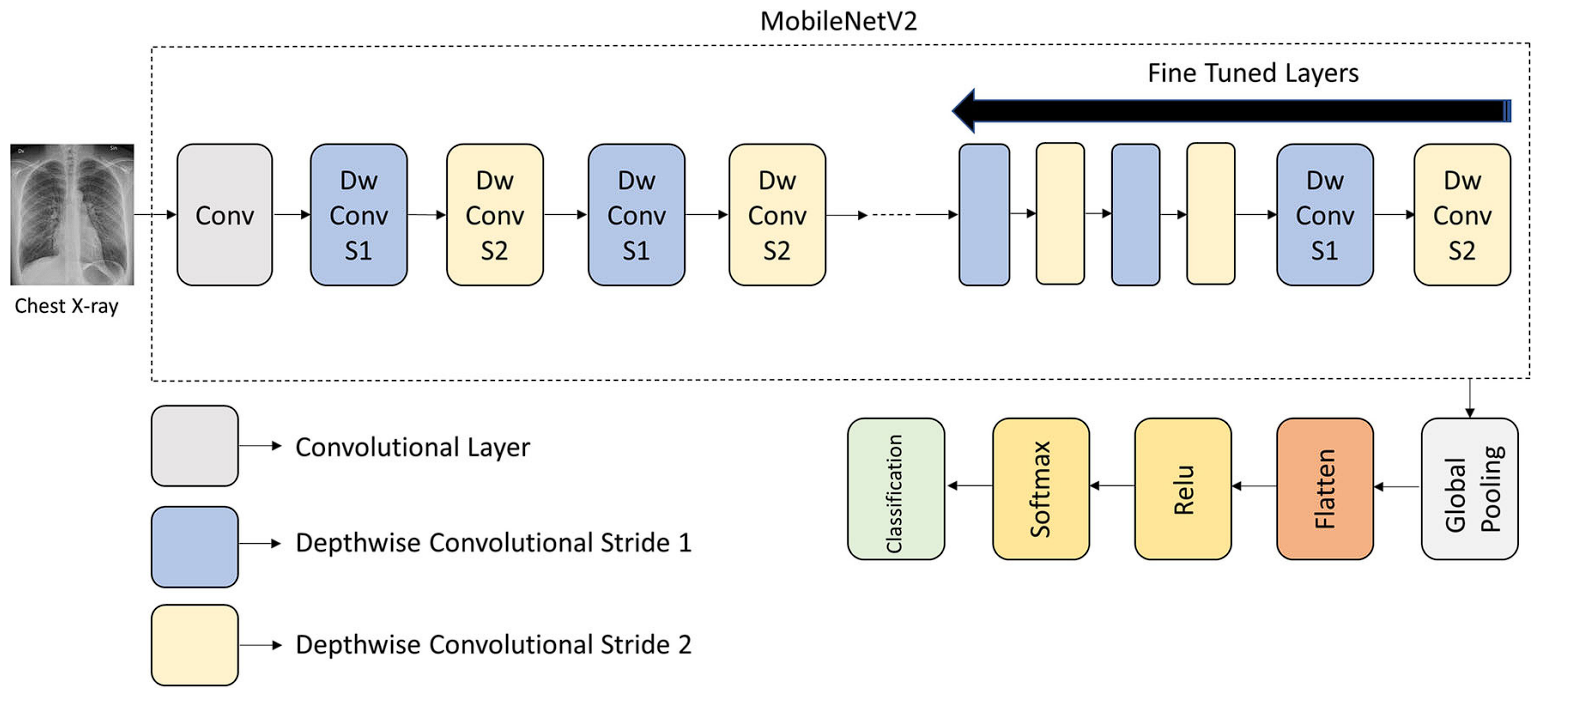

In [ ]:
# Import necessary modules from TensorFlow's Keras API

# Import the 'layers' and 'models' submodules from tensorflow.keras
# 'layers' is used to build different types of neural network layers (e.g., Conv2D, Dense, etc.)
# 'models' provides APIs to create and manage models (Sequential and Functional APIs)
from tensorflow.keras import layers, models

# Import the pre-trained MobileNetV2 model from keras.applications
# MobileNetV2 is a lightweight deep convolutional neural network architecture for mobile and edge devices
# It can be used as a feature extractor or a full model for transfer learning
from tensorflow.keras.applications import MobileNetV2


In [ ]:
# Defining parameters for image processing
batch_size = 32  # Set batch size for loading data (number of samples per batch)
img_height = 224  # Set height for resizing input images
img_width = 224  # Set width for resizing input images

In [ ]:
# Load the MobileNetV2 model with pre-trained weights from ImageNet
# weights='imagenet' means the model is loaded with weights learned from training on the ImageNet dataset
# input_shape specifies the shape of input images (height, width, 3 channels for RGB)
# include_top=False excludes the fully connected layers at the top of the model (used for classification in ImageNet)
# This allows you to add your own custom classification layers on top (for transfer learning)
base_model = MobileNetV2(weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the base model so its weights won’t be updated during training
# This helps retain the valuable features learned from ImageNet and trains only the new custom layers on top
base_model.trainable = False


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# model = models.Sequential([
#     base_model,
#     layers.AveragePooling2D(),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(1, activation='sigmoid')
# ])


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

epochs = 2

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/2


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2, 2, 1)

In [ ]:
from tensorflow.keras.preprocessing import image

# Load the image and preprocess it
def preprocess_image(img_path, img_height, img_width):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    print(img_array.shape)
    return img_array

In [ ]:
# Path to your image
img_path = '/content/Normal-6892.png'

# Preprocess the image
img_array = preprocess_image(img_path, img_height, img_width)

# Predict
prediction = model.predict(img_array)
prediction

(1, 180, 180, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0.7060626]], dtype=float32)

In [ ]:
# Convert prediction to class label
if prediction[0][0] > 0.5:
    print("Predicted class: 1 (Positive)")
else:
    print("Predicted class: 0 (Negative)")